In [1]:
#Import Modules
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Niño 3.4 index
1.1  Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [2]:
#Open the netCDF4 file "NOAA_NCDC_ERSST_v3b_SST.nc"
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

#Check the data
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [35]:
# 计算SST anomalies(海表温度异常)，下文用sst_anom表示

#Group data by month
group_data = ds.sst.sel(lat=slice(-5,5),lon=slice(120,170)).groupby('time.month')

#Monthly climatology for sst就是对grouped data求均值，下式可求Niño 3.4区域(5N-5S, 120W-170W)1960-2016年的sst_anom
sst_anom = group_data - group_data.mean(dim='time')

#Check the data
sst_anom.data

array([[[-0.4533596 , -0.43008804, -0.3652172 , ..., -0.5904255 ,
         -0.51613617, -0.5157356 ],
        [-0.14541245, -0.14106178, -0.20046997, ..., -0.60107803,
         -0.5806999 , -0.5200424 ],
        [ 0.03437614, -0.01860619, -0.1291542 , ..., -0.61279106,
         -0.5868416 , -0.55138206],
        [-0.03416824, -0.07881355, -0.139431  , ..., -0.5768242 ,
         -0.56368065, -0.5451031 ],
        [-0.11306   , -0.14630127, -0.18651962, ..., -0.47527504,
         -0.48386002, -0.49680328]],

       [[-0.6212349 , -0.5504303 , -0.48267746, ..., -0.68665695,
         -0.6161804 , -0.6163101 ],
        [-0.34970474, -0.29545593, -0.3325386 , ..., -0.77547646,
         -0.7685814 , -0.7126312 ],
        [-0.17095375, -0.17284012, -0.23443985, ..., -0.8361454 ,
         -0.82535934, -0.8006687 ],
        [-0.24916267, -0.223135  , -0.2143879 , ..., -0.7794876 ,
         -0.78274345, -0.779541  ],
        [-0.34809303, -0.3074398 , -0.268713  , ..., -0.58963966,
         -0.61

In [39]:
# Niño 3.4 index指的是Niño 3.4区域内的sst_anom 的平均值

#求权重
weights = np.cos(np.deg2rad(sst_anom.lat))

# Compute and plot the correct global monthly SST
sst_anom_weighted = sst_anom.weighted(weights)

#求Niño 3.4区域的sst_anom的平均
Niño34_index = sst_anom_weighted.mean(dim=('lon', 'lat'))
Niño34_index

<xarray.DataArray 'sst' (time: 684)>
array([-0.33638996, -0.41585815, -0.26664   , -0.4276189 , -0.22758518,
       -0.42429146, -0.32014814, -0.30221897, -0.17331952, -0.20741315,
       -0.10510893, -0.30911624, -0.38803932, -0.211489  , -0.28476936,
       -0.39501286, -0.4506555 , -0.40395057, -0.42096886, -0.38338092,
       -0.4106035 , -0.32912442, -0.20289609, -0.1630579 , -0.02445806,
       -0.17908697, -0.14089695, -0.11991052, -0.35554096, -0.10555383,
       -0.06479538, -0.01869799,  0.01712715,  0.16500634,  0.05754051,
       -0.03565433,  0.01745435, -0.01630831,  0.11188358,  0.1021039 ,
        0.06945682,  0.10516121, -0.04060424, -0.01642798, -0.08200661,
       -0.18764105, -0.16991448, -0.19285883, -0.2081322 , -0.23257314,
       -0.11923005, -0.05981921, -0.13725999, -0.2490667 , -0.14771739,
       -0.23599145, -0.18918028, -0.23364845, -0.38311532, -0.5865107 ,
       -0.46171734, -0.40290365, -0.3825734 , -0.45372882, -0.5147133 ,
       -0.5532466 , -0.7791769 , -0.6937601 , -0.680147  , -0.70179373,
       -0.6105421 , -0.46270046, -0.3224211 , -0.1980294 , -0.25919518,
       -0.28297117, -0.42976865, -0.42354086, -0.30485225, -0.22508942,
       -0.1687661 , -0.2634617 , -0.16453336, -0.18134326, -0.3284532 ,
       -0.32742646, -0.35337025, -0.12992977, -0.14608717, -0.22957988,
       -0.35436872, -0.23598713, -0.21285427, -0.36763   , -0.51899356,
       -0.37869728, -0.2638347 , -0.29159877, -0.20547517, -0.24955183,
...
        0.21692419,  0.23680545,  0.37184134,  0.44123662,  0.25355282,
        0.23837136,  0.2522538 ,  0.28857312,  0.39320984,  0.42629588,
        0.46736678,  0.35956097,  0.2694111 ,  0.22658968,  0.07507653,
        0.08545315,  0.19223866,  0.25733042,  0.43520048,  0.49819225,
        0.55772567,  0.57824177,  0.46498436,  0.29485676,  0.23305598,
        0.2516593 ,  0.22582202,  0.24085546,  0.23814315,  0.21548754,
        0.28677303,  0.21686858,  0.18300065,  0.07158842,  0.12057722,
        0.14227453,  0.154333  ,  0.21224445,  0.19045898,  0.25227484,
        0.1664547 ,  0.16027488,  0.30165184,  0.29444394,  0.04822364,
        0.18095872,  0.15239754,  0.21816058,  0.2085102 ,  0.29445845,
        0.3320227 ,  0.39355305,  0.50186485,  0.32500765,  0.29781276,
        0.3737057 ,  0.50674176,  0.4474836 ,  0.3534066 ,  0.4601946 ,
        0.4088171 ,  0.40151548,  0.5318536 ,  0.5547376 ,  0.46203965,
        0.43402624,  0.54108506,  0.625698  ,  0.6170744 ,  0.4098666 ,
        0.5242297 ,  0.4921955 ,  0.42475334,  0.45002115,  0.5353615 ,
        0.47425818,  0.49678022,  0.41703704,  0.49348462,  0.40909502,
        0.2848113 ,  0.03554019,  0.01618961,  0.05616043, -0.0359068 ,
        0.22071831,  0.23531047,  0.31650418,  0.20064299,  0.42838383,
        0.36537713,  0.49017444,  0.61845917,  0.62523806,  0.65994525,
        0.686784  ,  0.74171597,  0.69390213,  0.52139366], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

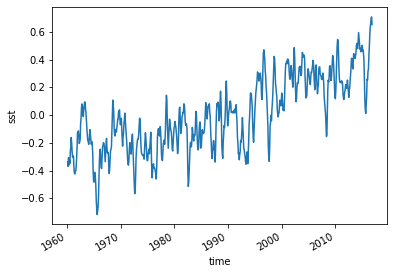

In [38]:
# Niño 3.4 index三个月的滑动平均值
moving_average = Niño34_index.rolling(time=3, center=True).mean()
moving_average.plot()